In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

from lib.util import plot_XY_function_graph
from lib.ode import plot_approximate_vs_exact

## Problem:

Use **rk4** method to approximate $y'=y-x^2+1$ with $y(0) = 0.5$ and give exact solution $y = x^2 + 2x + 1 - e^{x}/2$ <br/>

The image below provides a visual representation of the exact solution.


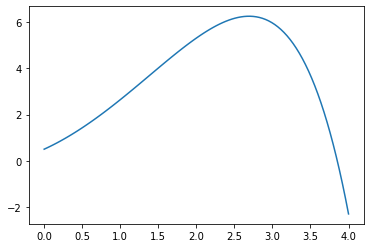

In [2]:
plot_XY_function_graph(0, 4, lambda x : x**2 + 2*x + 1 - np.exp(x)/2)

## **rk4** method:
Suppose $y$ is a function of $x$, and a **ODE** of the form $\frac{dy}{dx} = f(x, y)$ where $y(x_0) = y_0$.<br/>
Then we calculate value at $f(x_0 + h)$ using the below formula. Where $h$ is very small.<br/> 
<br/>
$k_1 = h * f(x_0, y_0)$<br/>
$k_2 = h * f(x_0 + h/2, y_0 + k_1/2)$<br/>
$k_3 = h * f(x_0 + h/2, y_0 + k_2/2)$<br/>
$k_4 = h * f(x_0 + h, y_0 + k_3)$<br/>
$f(x_0+h) = y_0 + (k_1 + 2*k_2 + 2 * k_3 +k_4)/6$<br/>
<br/>
By repeting this process we can calculate any value of $f(x)$.<br/>
This method is called **Fourth-Order Runge-Kutta(rk4)** method.

I calculate the slop at 4 different point and. Eular method calculate in 1
### rk4 method in python is implemented in below cell:

In [3]:
def rk4_method(x0, y0, h, f):
    k1 = h * f(x0, y0)
    k2 = h * f(x0 + h/2, y0 + k1/2)
    k3 = h * f(x0 + h/2, y0 + k2/2)
    k4 = h * f(x0 + h, y0 + k3)
    return y0 + (k1 + 2*k2 + 2*k3 + k4) / 6

> We have two algorithm to approximate the give equation. One algorithm takes total number of iteration to reach at $x_n$. And another algorithm takes step size $h$ to reach at $x_n$ iteratively.

In below we have solve the equation in two different algorithm.

## Solve using $n$ strategy:

### Algorithm:

Given $x_0$, $y_0$ and number of iteration $n$ we need to calculate $x_n$.<br/>

$ h = (xn - x0)/(n) $<br/>
`for` $i = 0 : n-1 \{ $<br/>
&emsp;  $x_{i+1} = x_i + h$<br/>
&emsp;  $y_{i+1} = $ `rk4_method` $(x_i, y_i, h, f)$<br/>
$\}$<br/> 

### rk4 algorithm using $n$ strategy in python is implemented in the below cell:

In [4]:
def solve_with_rk4_n_strategy(x0, y0, xn, n, f):
    X = np.zeros(n+1)
    Y = np.zeros(n+1)
    X[0] = x0
    Y[0] = y0
    h = (xn - x0)/(n)
    for i in range(0, n):
        X[i+1] = X[i] + h
        Y[i+1] = rk4_method(X[i], Y[i], h, f)
    return (X, Y)


In [5]:
# Code to generate graph
import ipywidgets as widgets
from IPython.display import display
def run_simulation_n(n):
    approximate = solve_with_rk4_n_strategy(0, .5, 4, n, lambda x, y: y - x**2 + 1)
    plot_approximate_vs_exact(approximate, lambda x : x**2 + 2*x + 1 - np.exp(x)/2)

play = widgets.Play(min=3, max=10, value=.5)
slider = widgets.IntSlider(min=3, max=10, description="n")
widgets.jslink((play, 'value'), (slider, 'value'))


ui = widgets.HBox([slider, play])
output = widgets.interactive_output(run_simulation_n, {'n':play})
display(ui, output)

Output()

## Solve using $h$ strategy: 

### Algorithm:

Given $x_0$, $y_0$ and step size $h$ we need to calculate $x_n$.<br/>

$i=0$<br/>
`while` $x_i + h < x_n\{$<br/>
&emsp;  $x_{i+1} = x_i + h$<br/>
&emsp;  $y_{i+1} = $ `rk4_method` $(x_i, y_i, h, f)$<br/>
&emsp;  $i = i + 1$<br/>
$\}$<br>
<br>
$h = x_n - x_i$<br/>
$x_n = x_i + h$<br/>
$y_n = $ `rk4_method` $(x_i, y_i, h, f)$<br/>

### rk4 algorithm using $n$ strategy in python is implemented in the below cell:

In [6]:
def solve_with_rk4_h_strategy(x0, y0, xn, h, f):
    X = np.zeros(100)
    Y = np.zeros(100)
    X[0] = x0;
    Y[0] = y0
    
    i = 0
    while (X[i] + h) < xn:
        X[i+1] = X[i] + h
        Y[i+1] = rk4_method(X[i], Y[i], h, f)
        i = i + 1
    
    h = xn - X[i]
    X[i+1] = X[i] + h
    Y[i+1] = rk4_method(X[i], Y[i], h, f)
    i = i + 1
    
    return (X[:i+1], Y[:i+1])

In [7]:
# Code to generate graph

import ipywidgets as widgets
from IPython.display import display

def run_simulation_h(h):
    approximate = solve_with_rk4_h_strategy(0, .5, 4, h, lambda x, y: y - x**2 + 1)
    plot_approximate_vs_exact(approximate, lambda x : x**2 + 2*x + 1 - np.exp(x)/2)

slider = widgets.FloatSlider(min=.1, max=1, description="h")

output = widgets.interactive_output(run_simulation_h, {'h':slider})
display(slider, output)


FloatSlider(value=0.1, description='h', max=1.0, min=0.1)

Output()